# Mathematics for Machine Learning

In [15]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as mfm

In [14]:
from mpl_toolkits import mplot3d

## Function Graphs

### Linear Graphs

In [2]:
mpl.style.use('bmh')
mpl.style.use('seaborn-whitegrid')

In [4]:
def arrowed_spines(fig, ax, remove_ticks=False):

    xmin, xmax = ax.get_xlim() 
    ymin, ymax = ax.get_ylim()

    # removing the default axis on all sides:
    for side in ['bottom','right','top','left']:
        ax.spines[side].set_visible(False)

    if remove_ticks == True: 
        # removing the axis ticks
        plt.xticks([]) # labels 
        plt.yticks([])
        ax.xaxis.set_ticks_position('none') # tick markers
        ax.yaxis.set_ticks_position('none')

    # get width and height of axes object to compute 
    # matching arrowhead length and width
    dps = fig.dpi_scale_trans.inverted()
    bbox = ax.get_window_extent().transformed(dps)
    width, height = bbox.width, bbox.height

    # manual arrowhead width and length
    hw = 1./50.*(ymax-ymin) 
    hl = 1./25.*(xmax-xmin)
    lw = 1. # axis line width
    ohg = 0.4 # arrow overhang

    # compute matching arrowhead length and width
    yhw = hw/(ymax-ymin)*(xmax-xmin)* height/width 
    yhl = hl/(xmax-xmin)*(ymax-ymin)* width/height

    # draw x and y axis
    ax.arrow(xmin, 0, xmax-xmin, 0., fc='k', ec='k', lw = lw, 
             head_width=hw, head_length=hl, #overhang = ohg, 
             length_includes_head= True, clip_on = False) 

    ax.arrow(0, ymin, 0., ymax-ymin, fc='k', ec='k', lw = lw, 
             head_width=yhw, head_length=yhl, #overhang = ohg, 
             length_includes_head= True, clip_on = False)

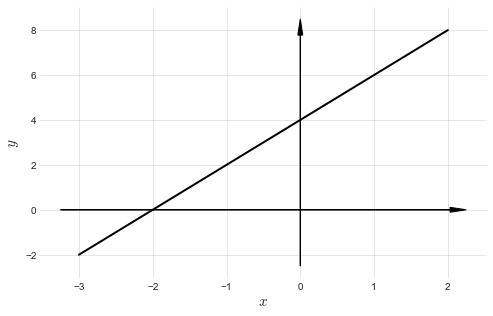

In [8]:
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(1,1,1)
ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=10)
plt.xlabel('$x$', fontsize=15)  ## using $ to use latex function.
plt.ylabel('$y$', fontsize=15)

x = np.linspace(-3,2,10)
y=2*x+4
ax.plot(x, y, 'k')

arrowed_spines(fig, ax)
plt.show()

### Exponential Graphs

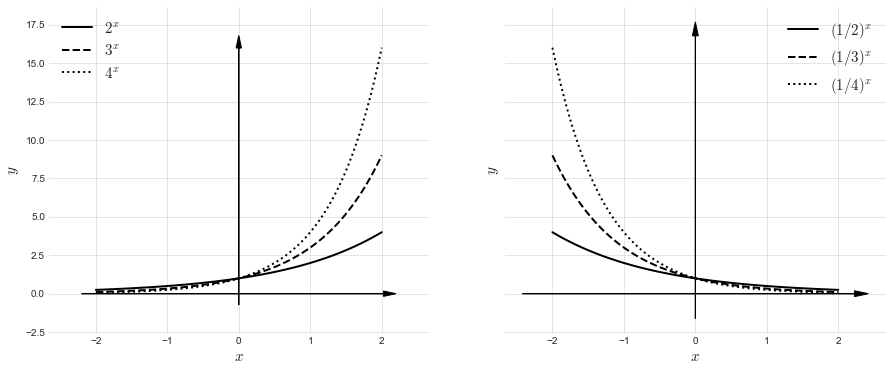

In [9]:
## basic figure and ax setting for plots
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
fig.set_size_inches((15,6))

ax1.xaxis.set_tick_params(labelsize=10)
ax1.yaxis.set_tick_params(labelsize=10)

x = np.linspace(-2, 2, 100) ## x range setting
a1, a2, a3 = 2, 3, 4        ## x values for exponential 
y1, y2, y3 = a1**x, a2**x, a3**x   ## exponential functions

## figure #1 format generation
ax1.plot(x, y1, color='k', label=r"$2^x$")
ax1.plot(x, y2, '--', color='k', label=r"$3^x$")
ax1.plot(x, y3, ':', color='k', label=r"$4^x$")
    
ax1.set_xlabel('$x$', fontsize=15)
ax1.set_ylabel('$y$', fontsize=15)
ax1.legend(fontsize=15)

ax2.xaxis.set_tick_params(labelsize=10)
ax2.yaxis.set_tick_params(labelsize=10)

x = np.linspace(-2, 2, 100) ## x range setting
a1, a2, a3 = 1/2, 1/3, 1/4  ## generating different exponential x values
y1, y2, y3 = a1**x, a2**x, a3**x  ## exponential functions

## figure #2 format generation
ax2.plot(x, y1, color='k', label=r"$(1/2)^x$")
ax2.plot(x, y2, '--', color='k', label=r"$(1/3)^x$")
ax2.plot(x, y3, ':', color='k', label=r"$(1/4)^x$")
    
ax2.set_xlabel('$x$', fontsize=15)
ax2.set_ylabel('$y$', fontsize=15)
ax2.legend(fontsize=15)

arrowed_spines(fig, ax1)
arrowed_spines(fig, ax2)

plt.show()

### Logistic Graphs

In [10]:
## log function definition
def log(x, base):
    return np.log(x)/np.log(base)

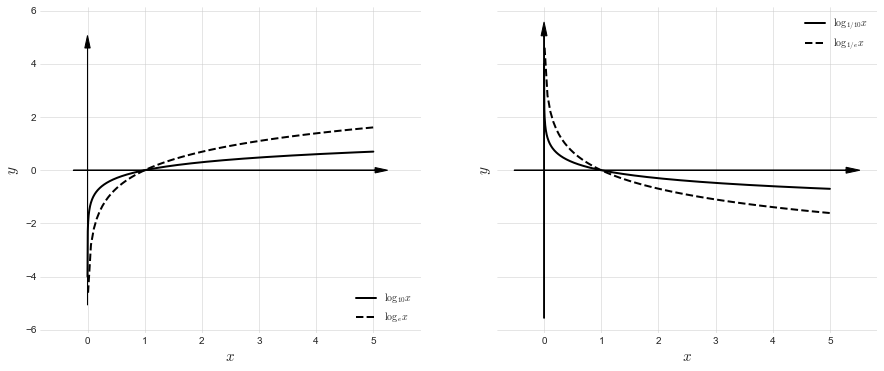

In [12]:
## basic plot environment settings
fig, (ax1, ax2) = plt.subplots(1, 2, sharex=True, sharey=True)
fig.set_size_inches((15,6))

ax1.xaxis.set_tick_params(labelsize=10)
ax1.yaxis.set_tick_params(labelsize=10)

x1 = np.linspace(0.0001, 5, 1000)
x2 = np.linspace(0.01, 5, 100)
y1, y2 = log(x1, 10), log(x2, np.e) 

ax1.plot(x1, y1, label=r"$\log_{10} x$", color='k')
ax1.plot(x2, y2, '--', label=r"$\log_{e} x$", color='k')

ax1.set_xlabel('$x$', fontsize=15)
ax1.set_ylabel('$y$', fontsize=15)
ax1.legend(fontsize=10, loc='lower right')

ax2.xaxis.set_tick_params(labelsize=10)
ax2.yaxis.set_tick_params(labelsize=10)

x1 = np.linspace(0.0001, 5, 1000)
x2 = np.linspace(0.01, 5, 100)
y1, y2 = log(x1, 1/10), log(x2, 1/np.e) 

ax2.plot(x1, y1, label=r"$\log_{1/10} x$",  color='k')
ax2.plot(x2, y2, '--', label=r"$\log_{1/e} x$", color='k')
    
ax2.set_xlabel('$x$', fontsize=15)
ax2.set_ylabel('$y$', fontsize=15)
ax2.legend(fontsize=10, loc='upper right')

arrowed_spines(fig, ax1)
arrowed_spines(fig, ax2)

plt.show()

### Sigmoid Graphs

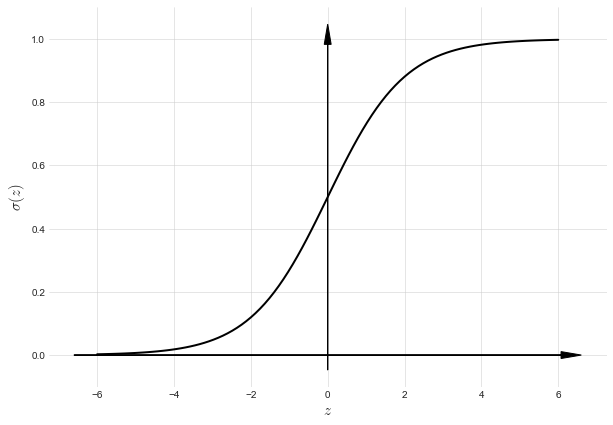

In [13]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(1, 1, 1)

ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=10)

z = np.linspace(-6, 6, 100)
sigma = 1/(1+np.exp(-z))

ax.plot(z, sigma, color='k')
    
ax.set_xlabel('$z$', fontsize=15)
ax.set_ylabel(r'$\sigma(z)$', fontsize=15)

arrowed_spines(fig, ax)


plt.show()

### Univariate Vector Graphs

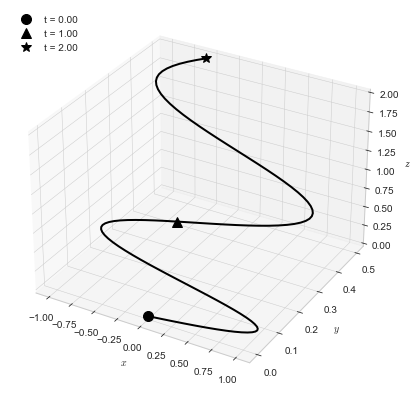

In [17]:
fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection='3d')  ## Generating axis that projects 3-dimension
ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=10)
ax.zaxis.set_tick_params(labelsize=10)
ax.set_xlabel('$x$', fontsize=10)
ax.set_ylabel('$y$', fontsize=10)
ax.set_zlabel('$z$', fontsize=10)

t = np.linspace(0, 2, 101) ## t value range setting

## defining each x, y, z functions
x = np.sin(6*t)
y = 1/4 * t
z = t**2 / 2

ax.plot3D(x, y, z, c='k')
ax.plot([x[0]],  [y[0]],  [z[0]],  'o', markersize=10, color='k',
        label="t = {:.2f}".format(t[0]))
ax.plot([x[50]], [y[50]], [z[50]], '^', markersize=10, color='k',
        label="t = {:.2f}".format(t[50]))
ax.plot([x[-1]], [y[-1]], [z[-1]], '*', markersize=10, color='k',
        label="t = {:.2f}".format(t[-1])) 

ax.legend(fontsize=10, loc="upper left")
    
plt.show()

### Multivariate Scalar Graphs

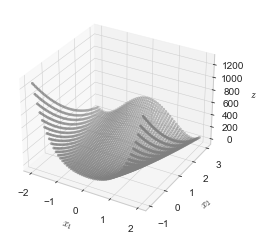

In [18]:
ax = plt.axes(projection='3d')
ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=10)
ax.zaxis.set_tick_params(labelsize=10)
ax.set_xlabel(r'$x_1$', fontsize=10)
ax.set_ylabel(r'$x_2$', fontsize=10)
ax.set_zlabel(r'$z$', fontsize=10)

x1 = np.linspace(-2, 2, 50)
x2 = np.linspace(-1, 3, 50)
X1, X2 = np.meshgrid(x1, x2)  ## generating grid for each variable
Z = 50*(X2 - X1**2)**2 + (2-X1)**2 ## z function for two input variables(x1,x2)

ax.scatter3D(X1, X2, Z, marker='.', color='gray')

plt.show()

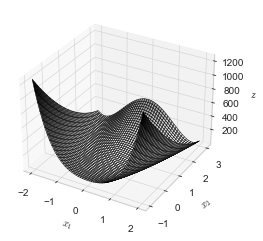

In [19]:
ax = plt.axes(projection='3d')
ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=10)
ax.zaxis.set_tick_params(labelsize=10)
ax.set_xlabel(r'$x_1$', fontsize=10)
ax.set_ylabel(r'$x_2$', fontsize=10)
ax.set_zlabel(r'$z$', fontsize=10)

x1 = np.linspace(-2, 2, 50)
x2 = np.linspace(-1, 3, 50)
X1, X2 = np.meshgrid(x1, x2)  ## generating grid for each variable
Z = 50*(X2 - X1**2)**2 + (2-X1)**2 ## z function for two input variables(x1,x2)

ax.plot_surface(X1, X2, Z, cmap=plt.cm.binary, edgecolor="k")

plt.show()

### Multivariate Vector Graphs

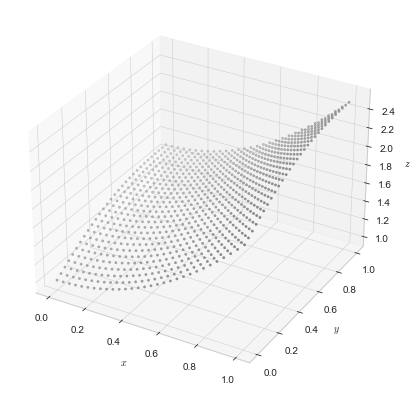

In [20]:
fig = plt.figure(figsize=(7, 7))
ax = plt.axes(projection='3d')
ax.xaxis.set_tick_params(labelsize=10)
ax.yaxis.set_tick_params(labelsize=10)
ax.zaxis.set_tick_params(labelsize=10)
ax.set_xlabel(r'$x$', fontsize=10)
ax.set_ylabel(r'$y$', fontsize=10)
ax.set_zlabel(r'$z$', fontsize=10)

u = np.linspace(0,1,30)
v = np.linspace(0,1,30)
U, V = np.meshgrid(u, v)
X = U
Y = V
Z = (1+U**2) + (V/(1+V**2))

ax.scatter3D(X, Y, Z, marker='.', color='gray')
# ax.plot_surface(X, Y, Z, color='gray')

plt.show()